# Unsupervised Learing Methods

## PCA

In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
file = "Project/Data/forestfires.csv"
fire = pd.read_csv(file)
fire.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [7]:
df = pd.get_dummies(fire, prefix=['month', 'day'])
df.keys()

Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'area', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_fri', 'day_mon', 'day_sat', 'day_sun',
       'day_thu', 'day_tue', 'day_wed'],
      dtype='object')

In [9]:
data = df.drop(columns = ["area"])
scaled_data = preprocessing.scale(data).T
pca = PCA()
pca.fit(scaled_data) 
pca_data = pca.transform(scaled_data)
comp = pca.fit_transform(scaled_data.T)

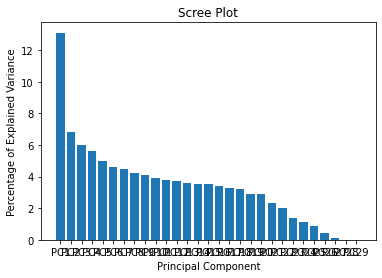

In [19]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

fig = plt.figure()
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()
fig.savefig("Scree")

Text(0, 0.5, 'PC2 - 6.8%')

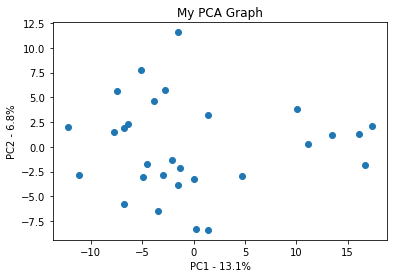

In [11]:
pca_df = pd.DataFrame(pca_data, columns=labels)
plt.scatter(pca_df.PC1, pca_df.PC9)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

In [82]:
target = pd.DataFrame(fire["area"] > 0.0)
target["area"][0]

False

In [13]:
pincipalDF =  pd.DataFrame(data = comp[:,[0,1]], columns = ['principal component 1', 'principal component 2'])
target = pd.DataFrame(fire["area"] > 0.0)
pc_class = pd.concat([pincipalDF, target], axis = 1)
pc_class["area"]

0      False
1      False
2      False
3      False
4      False
       ...  
512     True
513     True
514     True
515    False
516    False
Name: area, Length: 517, dtype: bool

In [14]:
colors = []
for i in range(len(pc_class["area"])):
    if pc_class["area"][i] == True:
        colors.append("r")
    else:
        colors.append("b")

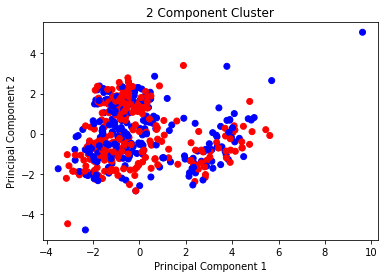

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 Component Cluster')
plt.scatter(pc_class['principal component 1'], pc_class['principal component 2'], c=colors)
plt.show()
fig.savefig("2 Component Cluster")

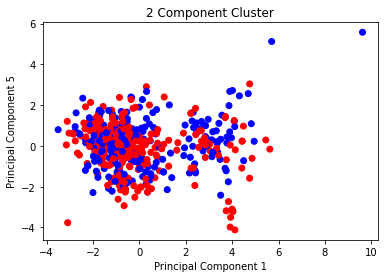

In [16]:
pincipalDF2 =  pd.DataFrame(data = comp[:,[0,4]], columns = ['principal component 1', 'principal component 5'])

pc_class2 = pd.concat([pincipalDF2, target], axis = 1)
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 5')
ax.set_title('2 Component Cluster')
plt.scatter(pc_class2['principal component 1'], pc_class2['principal component 5'], c=colors)
plt.show()
fig.savefig("2 Component Cluster(1,5)")

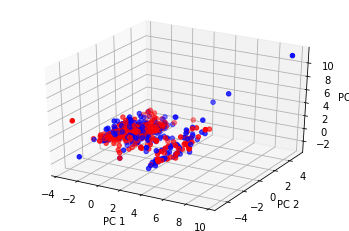

In [49]:
#3d plot of first 3 principal components:
from mpl_toolkits.mplot3d import Axes3D as a3d

pincipalDF3 =  pd.DataFrame(data = comp[:,[0,1,2]], columns = ['principal component 1', 'principal component 2','principal component 3'])
pc_class3 = pd.concat([pincipalDF3, target], axis = 1)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.scatter(pc_class3['principal component 1'],pc_class3['principal component 2'],pc_class3['principal component 3'],c=colors)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

plt.show()


fig.savefig("3d_comp_1_2_3")

In [97]:
#K Means

kmeans = KMeans(n_clusters=2, random_state=0)

fit = fit(scaled_data.T)
print(kmeans)
km_df = pd.concat([pd.DataFrame(kmeans.labels_), target], axis = 1)
km_df.head()

tn = 0
tp = 0
fn = 0
fp = 0
for i in range(len(km_df["area"])):
    if km_df[0][i] == 0 and km_df["area"][i] == False:
        tn += 1
    elif km_df[0][i] == 1 and km_df["area"][i] == True:
        tp += 1
    elif km_df[0][i] == 0 and km_df["area"][i] == True:
        fn += 1
    elif km_df[0][i] == 1 and km_df["area"][i] == False:
        fp += 1
        
        
accuracy = (tn + tp)/(tn + tp + fp + fn)  
print(accuracy)     


KMeans(n_clusters=2, random_state=0)
0.44874274661508706


In [ ]:
labels = kmeans.predict

## K-Means Clustering

## Hirearchical Clustering

## Spectral Clustering

In [1]:
#Import Libraries
import scipy.linalg as spla
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import *
import seaborn as sns
from sklearn.metrics import *

In [93]:
#Import data
file = "Project/Data/forestfires.csv"
fire = pd.read_csv(file)
fire.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
#Define Functions

# transform similatiy matrix to laplacian 
def generate_laplacian(L):
    # translate to positive matrix scaling between 0 and 1.0
    min_entry = L.min().min() 
    if min_entry < 0:
        L = (L - min_entry)/(1 - min_entry)
    L= (L - np.diag(np.diag(L))).values
    return (L - np.diag(sum(L.T)))

In [95]:
data = pd.get_dummies(fire.drop(columns = ["area"]), prefix= ['month', 'day'])
data.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,1,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,1,0,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,0,1,0,0,0


In [96]:
gammas = [.01,.05,.1, 0.15]
result = {}
for gam in gammas:
    sc = SpectralClustering(n_clusters = 2, affinity='rbf', gamma=gam)
    sc.fit_predict(data)
    #A = generate_laplacian(pd.DataFrame(sc.affinity_matrix_))
    #D,V = spla.eigh(A)
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(517):
        if  sc.labels_.copy()[i] == 1 and target["area"][i] == False:
            tn += 1
        elif sc.labels_.copy()[i] == 1 and target["area"][i]  == True:
            tp += 1
        elif sc.labels_.copy()[i]== 0 and target["area"][i]  == True:
            fn += 1
        elif sc.labels_.copy()[i] == 1 and target["area"][i]  == False:
            fp += 1
    
    result[gam] = {"True Negative": tn, "True Positive": tp, "False Negative": fn, "False Positive": fp}


        

C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [91]:
result

{0.01: {'True Negative': 1,
  'True Positive': 0,
  'False Negative': 270,
  'False Positive': 0},
 0.05: {'True Negative': 1,
  'True Positive': 0,
  'False Negative': 270,
  'False Positive': 0},
 0.1: {'True Negative': 0,
  'True Positive': 1,
  'False Negative': 269,
  'False Positive': 0},
 0.15: {'True Negative': 0,
  'True Positive': 1,
  'False Negative': 269,
  'False Positive': 0}}

In [75]:
labels = sc.labels_.copy()
labels
len(labels)

517

IndexError: index 22 is out of bounds for axis 0 with size 22

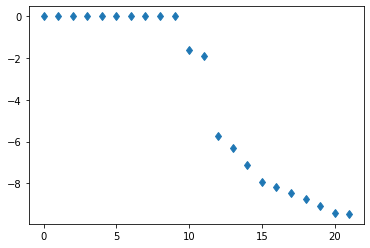

In [29]:
plt.plot(np.sort(D)[::-1][:D.shape[0]], "d")
ax = plt.gca()
ax.set_xbound(-1,D.shape[0])
ax.set_ybound(D[D.shape[0]], -D[D.shape[0]])

In [87]:
result = {}
gam =0.1
tn = 25
tp = 30
result[gam] = {"True Negative:": tn, "True Positive:": tp}
result

{0.1: {'True Negative:': 25, 'True Positive:': 30}}